In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib

In [2]:
print(load_iris()['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
dataset = load_iris()['data']
target = load_iris()['target']
df = pd.DataFrame(dataset)
df = df.rename( columns={0: "SL", 1: "SW", 2:"PL",3:"PW"})
df = df.assign(Class=pd.Series(target))
df = df[['SL','SW','Class']]
df.head()

,SL,SW,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


KNN with $k = 1$ is equivalent to just putting each point into its own polygon with maximum seperation. <br>
Therefore, there is really no need to calling the KNN Function.

Below, inspired from [here](https://csiu.github.io/blog/update/2017/04/17/day52.html), I am plotting the Voronoi Partition.

In [4]:
labels = ['Setosa','Versicolor','Virginica']
plt.rcParams["figure.figsize"] = [16,9]

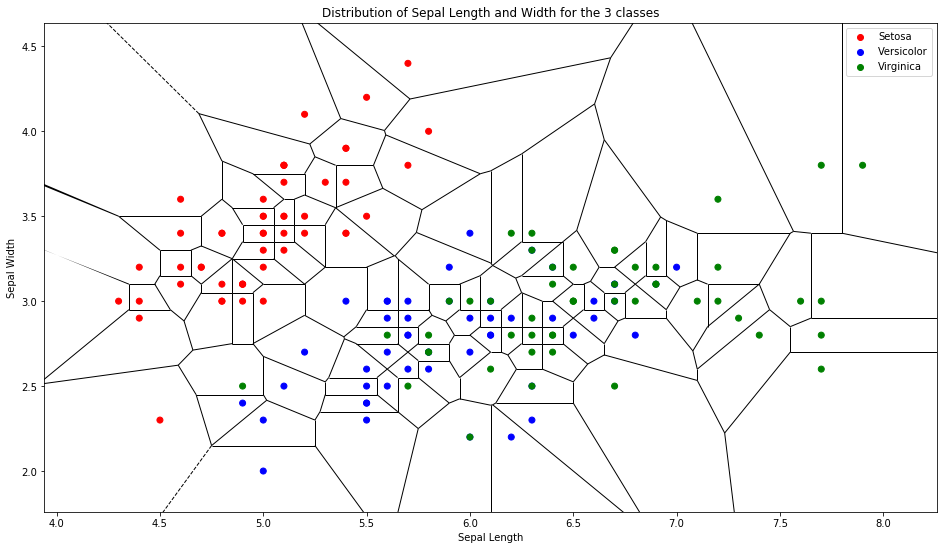

In [5]:

vor = Voronoi(df[['SL','SW']])
voronoi_plot_2d(vor,show_vertices=False, show_points = False)
colors = ["red","blue","green"]
p = plt.scatter(df['SL'],df['SW'],c = df['Class'],
               cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Distribution of Sepal Length and Width for the 3 classes')
plt.legend((p,p,p),labels)
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[0].set_color(colors[0])
legend.legendHandles[1].set_color(colors[1])
legend.legendHandles[2].set_color(colors[2])
